# Support Vector Machine
- A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model
- Capable of performing linear or nonlinear classification, regression, and even outlier detection. 
- One of the most popular and successful models in Machine Learning
- SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.
- The idea is to classify the instances with a large margin of classification
- Understand the meaning of `kernel` and `soft margin` in SVM

If the dataset is linearly separable, there are infinitely many hyperplanes that can be used to separate the data. However, we want to have the best hyperplane such that it is robust to variations in test or new data. For example in the below figure, the left panel desribes two possible lines that can be used to classify the data. However the blue boundary line is prefered because it can still correctly classify the data even if there is small variation in new data points. The right figure describes the `margins` (dotted lines) which is the shortest distance between any data points to the boundary line. SVM tries to find the hyperplane that can maximise this margin. All the points that lie on these two pairs of margin lines are called `support vectors`.

<center><img src='../assets/SVM.png' width="500"></center>

Next, we are going to see how we can use a variant of SVM to perform a classification task. 
The dataset in this part is called the iris dataset in which we try to predict what type of flowers they are based on the flowers' features.
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model: hard vs soft. Change the value of C here then rerun the experiment
# to see the difference between hard and soft margin classification
# svm_clf = SVC(kernel="linear", C=float("inf")) #hard
svm_clf = SVC(kernel="linear", C=0.7) #soft
svm_clf.fit(X, y)

SVC(C=0.7, kernel='linear')

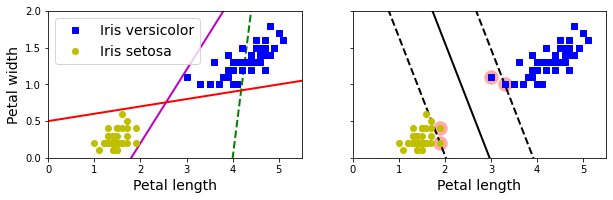

In [3]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

The SVC model that we have used applied a `hard` margin rule where none of the datapoint is allowed between the margin lines. However this is an issue with SVM model as it will be sensitive to outliers and it only works with data that is
linearly separable. The `soft margin classification` is an enhanced modification to SVM that allows it to be more flexible. By introducing the C hyperparameter, we can configure the 'hardness' of SVM. Higher value of C make sures that no points are allowed within the margin region, while lower value of C allows some 'slack' which lets some data points to be closer to the boundary. 

#### Apply SVM on the Titanic dataset
- Read the `final_titanic_train.csv` which is the pre-processed datatset from previous session
- Apply the SVC model to classify this data
- Use cross validation with different values of C to compare accuracy scores

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
final_train = pd.read_csv('../data/final_titanic_train.csv')

# create X (features) and y (response)
X = final_train.loc[:, ~final_train.columns.isin(['Survived'])]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
svm_clf = SVC(kernel="linear", C=1) #soft
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [6]:
svm_clf.score(X_train, y_train)

0.7921348314606742

A linear classifier using SVM is able to achieve an accuracy score of 79.2%, which is similar to that of logistic regression. There are other 
modifications to SVM that make it possible to introduce non-linearity into the feature. A `kernel` trick is a transformation method applied to combine features together or increase the order of the feature to make it non-linear. The below piece of code construct a pipeline with feature scaling, apply the kernel trick with a degree of polynomial of 3. This model is then applied to the Titanic dataset and achieves 82 - 83% even in cross validation mode. 

In [7]:
# Perform cross validation score to validate the accuracy of the training
# cross_val_score(SVC(kernel="linear", C=1), X, y, cv=10).mean()

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=1)) 
])

poly_kernel_svm_clf.fit(X_train, y_train)
poly_kernel_svm_clf.score(X_train, y_train)

0.8441011235955056

In [9]:
cross_val_score(poly_kernel_svm_clf, X, y, cv=10).mean()

0.8170661672908863

#### Summary:
- SVM is a powerful Machine Learning method that is applicable to both regression and classification
- There are many variants and modifications we can make to SVM to make it more powerful
- Feature scaling is important for SVM